In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='Survived', ylabel='count'>

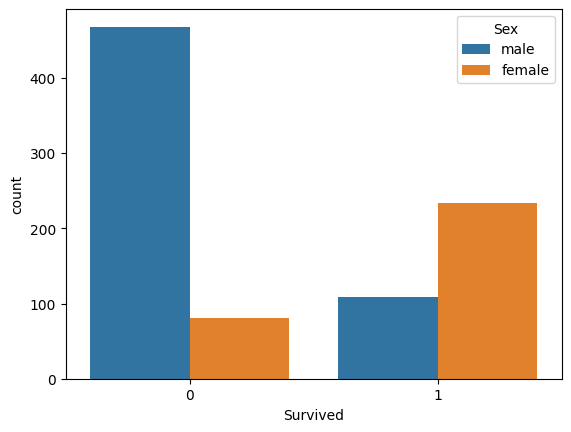

In [5]:
sns.countplot(x = 'Survived', hue= 'Sex', data = train)

<Axes: xlabel='Pclass', ylabel='Age'>

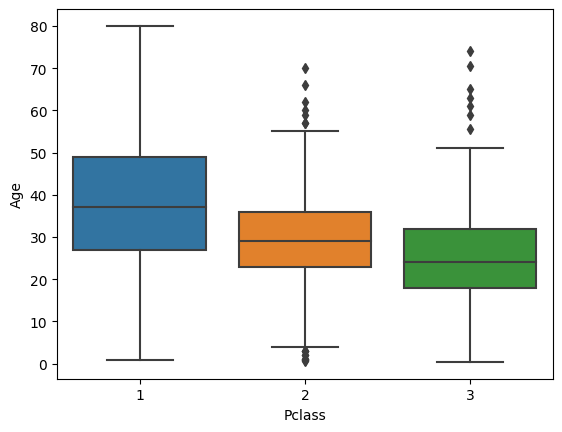

In [6]:
sns.boxplot(x='Pclass', y= 'Age', data =train)

In [7]:
#limpieza de datos 
#para quitar los NaN con una deficion de imputar edad en funcion de la clase

def imputar_edad(cols):
    Age= cols[0]
    Pclass = cols[1]
    
    if pd.isna(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age    

In [8]:
train['Age'] = train[['Age', 'Pclass']].apply(imputar_edad, axis = 1)

In [9]:
#train.isna().sum()

In [10]:
#para quitar la columna Cabin ya que tiene 700 null valius de 900 filas que hay
train.drop('Cabin', axis =1, inplace=True)

In [11]:
#para quitar las solo 2 celdas de otra columna con valores NuN que habia en una columna
#el resto de valores de esa columna siguen

train.dropna(inplace = True)

In [12]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [13]:
#variables categoricas que hay que pasar (a traves de dummies) con 0 y 1

sex = pd.get_dummies(train['Sex'], drop_first = True) #para quitar la primera de las dos
embarked = pd.get_dummies(train['Embarked'], drop_first = True)

In [14]:
train = pd.concat([train, sex, embarked], axis = 1) #unidas por columnas las 3 columnas

In [15]:
#quitamos columnas que ya se han pasado a numeros y tal
train.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'PassengerId'], axis= 1, inplace = True)

In [16]:
X = train.drop('Survived', axis=1)
y= train['Survived']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
logmodel = LogisticRegression()

In [21]:
logmodel.fit(X_train, y_train)

C:\Users\Braulio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
predicciones = logmodel.predict(X_test)

In [23]:
predicciones

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1], dtype=int64)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
#para ver las puntuaciones

In [25]:
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       167
           1       0.72      0.75      0.74       100

    accuracy                           0.80       267
   macro avg       0.78      0.79      0.79       267
weighted avg       0.80      0.80      0.80       267



In [26]:
confusion_matrix(y_test, predicciones)

array([[138,  29],
       [ 25,  75]], dtype=int64)

In [27]:
#para sacar las probabilidades
y_pred_proba = logmodel.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# ROC CURVE

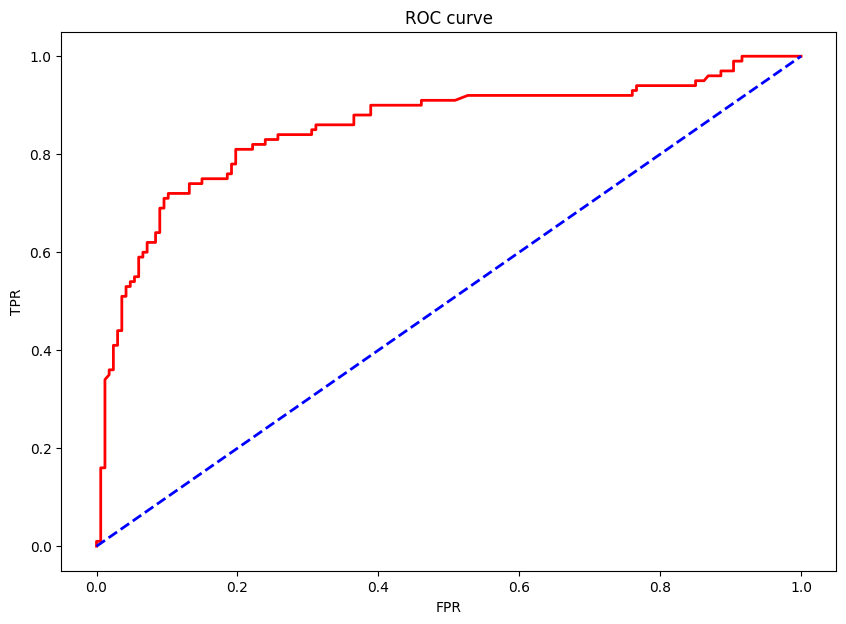

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize= (10,7))

#AÑADIR LA ROC
plt.plot(fpr,tpr,color='red', lw=2, label= 'ROC curve')

#random FPR y TPR
plt.plot([0,1], [0,1], color='blue', lw=2, linestyle='--')

#titulo y label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

# ENTREGA

In [29]:
test = pd.read_csv('test.csv')
test.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


In [30]:
test['Age'] = test[['Age', 'Pclass']].apply(imputar_edad, axis = 1)

In [31]:
test.drop('Cabin', axis =1, inplace=True)

In [32]:
test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [33]:
#imputacion sencilla
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

In [34]:
sex = pd.get_dummies(test['Sex'], drop_first = True) #para quitar la primera de las dos
embarked = pd.get_dummies(test['Embarked'], drop_first = True)

In [35]:
test = pd.concat([test, sex, embarked], axis = 1) #unidas las 3 columnas en una

In [36]:
#quitamos columnas que ya se han pasado a numeros y tal
test.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis= 1, inplace = True)

In [37]:
passenger_id = test[['PassengerId']]

In [38]:
test.drop('PassengerId', axis=1, inplace=True)

In [39]:
test.head(1)

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0


In [40]:
predicciones = pd.DataFrame(logmodel.predict(test))

In [41]:
test = pd.concat([passenger_id, predicciones], axis=1)

In [45]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [42]:
test.head()

,PassengerId,0
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [43]:
test.columns = ['PassengerId', 'Survived']

In [44]:
test.to_csv('sample_submission.csv', index = False)